In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
# Load the libraries

import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

Loading the dataset <br/>

In [22]:
#Loading Data set
csv_file_path = "/abalone.csv"
abalone = pd.read_csv(csv_file_path, sep=',')

# Columns/Features

Xcolumnnames = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Categorical Column 
Xcatcolumnname = ['Sex']

# Output column
Ycolumnname = ['Rings']

abalone.columns = Xcatcolumnname + Xcolumnnames + Ycolumnname

In [23]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


Divide the data into a training set and a test set (80%, 20%), <br>


In [24]:
rand_state = 27
trainsize = 0.8
testsize = 0.2

X = abalone[Xcolumnnames]
Y = abalone[Ycolumnname]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = testsize, random_state = rand_state)

# Storing the original train and test data to be used for ablation study later on

X_train_1 = X_train
X_test_1 = X_test

<h3><b>Normalization</b></h3>
Normalize the data using MinMaxScaler to get the range of values in the original data to a scale between 0 to 1, thus simplifying the calculations for the model further.

In [25]:
# Normalization of the inputs using MinMax Scaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)

X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

Run the model using its default configuration on the test data. Loop over values of K.

In [26]:
accuracy_list = []
kmax = 101
kstep = 1

# Defining a range of 40 values of K

k_range = range(1, kmax, kstep)

# Looping over the K values and finding the accuracy for each

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)

# Finding best accuracy and corresponding K value

best_acc = max(accuracy_list)
best_k = accuracy_list.index(best_acc)+1

Plot the above accuracies against the K values using the below code.

Text(0, 0.5, 'Accuracy')

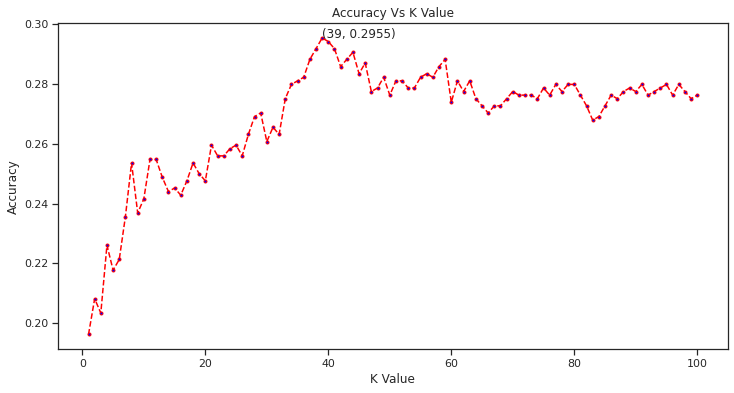

In [27]:
# Plotting the figure of K vs Accuracy

fig, ax = plt.subplots(figsize=(12,6))
text = '('+ str(best_k) + ', ' + str(round(best_acc, 4)) + ')'
ax.plot(k_range, accuracy_list, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=3)

plt.text(best_k, best_acc, text)
plt.title("Accuracy Vs K Value")
plt.xlabel('K Value')
plt.ylabel('Accuracy')

From the figure, it is seen that the best value of accuracy occurs at K=39 which is 0.2955

<h3><b>Improving KNN</b></h3>

Using weighted KNN for improving our results. 3 weighing schemes are used - Default, Manhatten and Euclidean <br/>

Default: p=2, weights = uniform <br/>
Manhatten: p=1, weights = distance <br/>
Euclidean: p=2, weights = distance <br/>

where P = Power parameter for the Minkowski metric <br/>

In [28]:
# Calculating accuracy for K values between 1 and kmax (with normalization)

acc_list_default = []
acc_list_manh = []
acc_list_eucl = []

for i in k_range:
    # Default
    knn_default = KNeighborsClassifier(n_neighbors=i, p=2, weights="uniform")
    # Manhatten
    knn_manh = KNeighborsClassifier(n_neighbors=i, p=1, weights="distance")
    # Euclidean
    knn_eucl = KNeighborsClassifier(n_neighbors=i, p=2, weights="distance")

    knn_default.fit(X_train, y_train)
    knn_manh.fit(X_train, y_train)
    knn_eucl.fit(X_train, y_train)

    y_pred_default = knn_default.predict(X_test)
    y_pred_manh = knn_manh.predict(X_test)
    y_pred_eucl = knn_eucl.predict(X_test)

    acc_default = accuracy_score(y_test, y_pred_default)
    acc_manh = accuracy_score(y_test, y_pred_manh)
    acc_eucl = accuracy_score(y_test, y_pred_eucl)
    
    acc_list_default.append(acc_default)
    acc_list_manh.append(acc_manh)
    acc_list_eucl.append(acc_eucl)

# Finding best accuracies of each scheme

b1 = max(acc_list_default)
b2 = max(acc_list_manh)
b3 = max(acc_list_eucl)

# Finding best accuracy 
best_acc = max([b1, b2, b3])


result = b1
best_k = acc_list_default.index(b1)+1
if b2 > result:
  result = b2
  best_k = acc_list_manh.index(b2)+1
if b3 > result:
  result = b3
  best_k = acc_list_eucl.index(b3)+1

Plot the above accuracies against the K values for all the three configurations (With normalization)

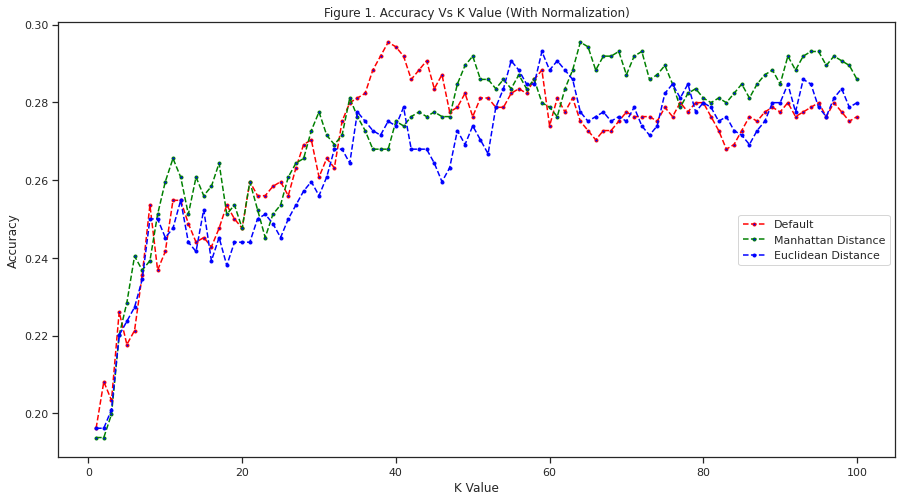

In [29]:
# Plotting the figure of K vs Accuracy for all the 3 configurations with normalization

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(k_range, acc_list_default, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=3)
ax.plot(k_range, acc_list_manh, color='green', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=3)
ax.plot(k_range, acc_list_eucl, color='blue', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=3)

plt.title("Figure 1. Accuracy Vs K Value (With Normalization)")
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# ax.spines['left'].set_position(('data', 1))
ax.legend(['Default', 'Manhattan Distance', 'Euclidean Distance'], loc="center right")

<h3><b>Ablation Study on Normalization</b></h3>

Performing Ablation study by removing the normalization step from the pipeline of preprocessing. 

In [30]:
# Calculating accuracy for K values between 1 and 40 (without normalization)
acc_list_abl_default = []
acc_list_abl_manh = []
acc_list_abl_eucl = []


for i in k_range:
    # Default
    knn_default = KNeighborsClassifier(n_neighbors=i, p=2, weights="uniform")
    # Manhatten
    knn_manh = KNeighborsClassifier(n_neighbors=i, p=1, weights="distance")
    # Euclidean
    knn_eucl = KNeighborsClassifier(n_neighbors=i, p=2, weights="distance")

    knn_default.fit(X_train_1, y_train)
    knn_manh.fit(X_train_1, y_train)
    knn_eucl.fit(X_train_1, y_train)

    y_pred_default = knn_default.predict(X_test_1)
    y_pred_manh = knn_manh.predict(X_test_1)
    y_pred_eucl = knn_eucl.predict(X_test_1)

    acc_default = accuracy_score(y_test, y_pred_default)
    acc_manh = accuracy_score(y_test, y_pred_manh)
    acc_eucl = accuracy_score(y_test, y_pred_eucl)
    
    acc_list_abl_default.append(acc_default)
    acc_list_abl_manh.append(acc_manh)
    acc_list_abl_eucl.append(acc_eucl)


# Finding best accuracy
c1 = max(acc_list_abl_default)
c2 = max(acc_list_abl_manh)
c3 = max(acc_list_abl_eucl)

best_acc_abl = max([c1, c2, c3])

result_abl = c1
best_k_abl = acc_list_abl_default.index(c1)+1
if c2 > result:
  result = c2
  best_k_abl = acc_list_abl_manh.index(c2)+1
if c3 > result:
  result = c3
  best_k_abl = acc_list_abl_eucl.index(c3)+1

Plot the above accuracies against the K values for all the three configurations (Without normalization)

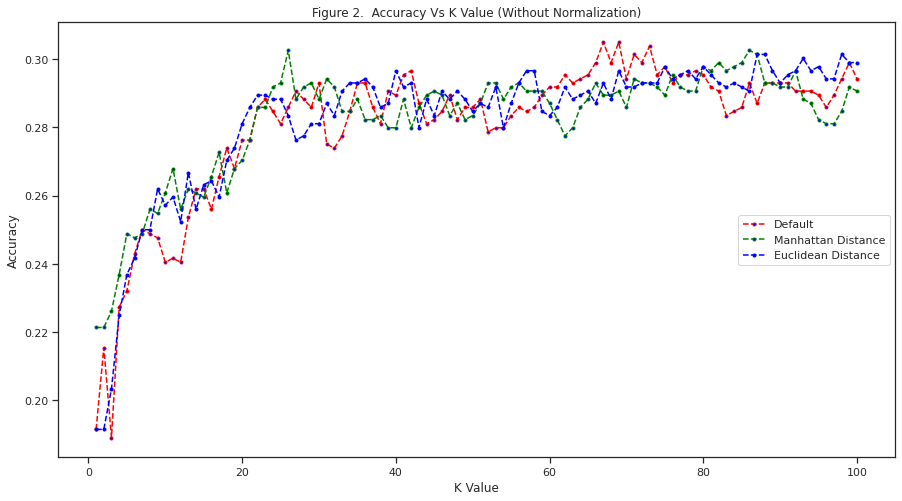

In [31]:
# Plotting the figure of K vs Accuracy for all the 3 configurations without normalization

fig, ax = plt.subplots(figsize=(15,8))

ax.plot(k_range, acc_list_abl_default, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=3)
ax.plot(k_range, acc_list_abl_manh, color='green', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=3)
ax.plot(k_range, acc_list_abl_eucl, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=3)

plt.title("Figure 2.  Accuracy Vs K Value (Without Normalization)")
plt.xlabel('K Value')
plt.ylabel('Accuracy')

# ax.spines['left'].set_position(('data', 1))
ax.legend(['Default', 'Manhattan Distance', 'Euclidean Distance'], loc="center right")

<h3>Conclusion</h3>

Comparing the two previous plots in Figure 1 and Figure 2, the following is observed: 




*   Effect of normalization/ Standardization - The normalizarion does not make the classifier reach high accuracy for any of the tested values of k. This is applicable to both uniform KNN and weighted KNN. <br>
*   Without the normalization, as k increases and the neighbourhood size inresases, the performance lowers. This is not observed in the case of normalized data. 
*   For the differenct weighting schemes, the performance is not very different.
*   The accuracy is overall low (below 30%). Hence it can be said that more complex models might be needed to classify well in this domain. 







